Final centers: [array([ 9.1,  9.1,  9.1]), array([ 0.1,  0.1,  0.1])]
Total Cost: 0.12


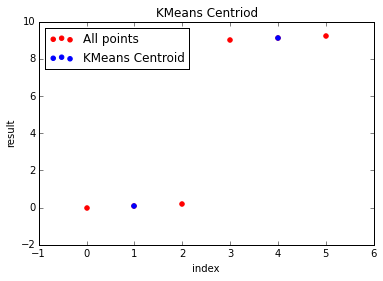

In [1]:
%matplotlib inline

import matplotlib
from matplotlib import pyplot as plt
from __future__ import print_function

import sys
import numpy as np
import pandas
import decimal
from pyspark.context import SparkContext

from pyspark.mllib.clustering import KMeans
from pyspark.sql import SQLContext
from pyspark.sql.types import *


def parseVector(line):    
	return np.array([float(x) for x in line.split(' ')])


def constructDataFrame(lines):
	parts = lines.map(lambda l: l.split(' '))
	diamonds = parts.map(lambda p: (float(p[0]),float(p[1]),float(p[2])))
	schema = StructType([ StructField("column1", FloatType(), True),StructField("column2", FloatType(), True),StructField("column3", FloatType(), True)])
	dataFrame = sqlContext.createDataFrame(diamonds, schema)
	inputDataFrame = pandas.DataFrame(dataFrame.toPandas(), columns = ('index','column1','column2','column3','result'))
	inputDataFrame['index'] = inputDataFrame.index
	return inputDataFrame

lines = sc.textFile("/Data/Spark/MLLib/KMeans_Data.txt")
    
data = lines.map(parseVector)
    
k = 2
    
model = KMeans.train(data, k)
    
print("Final centers: " + str(model.clusterCenters))
    
print("Total Cost: " + str(model.computeCost(data)))


clusterCenters = zip(model.clusterCenters[0], model.clusterCenters[1])
resultDataFrame = pandas.DataFrame(clusterCenters , dtype =float).transpose()
resultDataFrame.columns = ['column1','column2','column3']

# Since, all column's data remains same in both result and input dataframe, we considered only one column ('column1') for visualizing plot.

inputDataFrame = constructDataFrame(lines)
inputList = inputDataFrame['column1'].values.tolist()
resultList = resultDataFrame['column1'].values.tolist()

for i in range(len(inputList)): 
    for j in range(len(resultList)):
        if(round(decimal.Decimal(resultList[j]),1) == round(decimal.Decimal(inputList[i]),1)):   
            inputDataFrame.loc[i,'result'] = round(decimal.Decimal(resultList[j]),1)

# 'Scatter' plot is used here to visualize KMeans Centriod points 

plt.figure()
clusters = inputDataFrame.plot(kind='scatter', x = 'index', y='column1', color='Red', label='All points')
inputDataFrame.plot(kind='scatter', x='index', y='result', color='Blue', label='KMeans Centroid', ax=clusters)
plt.title('KMeans Centriod')
plt.legend(loc='upper left')